# Importação de bibliotecas

In [2]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
from PIL import Image
import plotly.graph_objects as go

In [3]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.expand_frame_repr', False )
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

# Importação dos dados

In [4]:
data_raw = pd.read_csv('/home/bruno/repos/aula_dsfame/data/dataset.csv', low_memory=False)

# Exploração preliminar dos dados

In [5]:
data_raw.sample(5)

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
32,Franz Wagner,SF,ORL,21,80,33,47,2608.7,1485,542,1118,48.5,130,360,36.1,271,322,84.2,70,259,329,283,167,77,17,183,2419,2,0,50
40,Spencer Dinwiddie,PG,BKN,30,79,41,38,2725.3,1369,460,1050,43.8,181,490,36.9,268,330,81.2,28,242,270,515,145,67,24,187,2594,9,0,-8
235,Nicolas Batum,PF,LAC,34,78,44,34,1709.6,478,160,381,42.0,124,317,39.1,34,48,70.8,62,237,299,121,50,54,44,149,1262,0,0,165
14,Pascal Siakam,PF,TOR,29,71,35,36,2652.0,1720,630,1313,48.0,93,287,32.4,367,474,77.4,131,425,556,415,169,65,36,228,3144,24,2,123
353,Anthony Gill,PF,WAS,30,59,21,38,624.6,195,71,132,53.8,4,29,13.8,49,67,73.1,37,62,99,34,15,7,12,70,407,0,0,-12


In [6]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,539.0,25.970315,4.315513,19.0,23.00,25.0,29.0,42.0
GP,539.0,48.040816,24.650686,1.0,30.50,54.0,68.0,83.0
W,539.0,24.018553,14.496366,0.0,12.00,25.0,36.0,57.0
L,539.0,24.022263,13.445866,0.0,14.00,25.0,34.0,60.0
Min,539.0,1103.617625,827.765114,1.0,329.00,970.2,1845.9,2963.2
PTS,539.0,523.426716,498.084360,0.0,120.50,374.0,769.5,2225.0
FGM,539.0,191.576994,178.351286,0.0,45.50,138.0,283.5,728.0
FGA,539.0,403.005566,369.595909,0.0,93.50,300.0,598.5,1559.0
FG%,539.0,46.325232,10.967271,0.0,41.65,45.5,50.6,100.0
3PM,539.0,56.324675,60.916821,0.0,5.00,36.0,92.0,301.0


In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [8]:
data_raw[data_raw['POS'].isna()]

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
534,Alondes Williams,NaN,BKN,23,1,1,0,5.3,0,0,0,0.0,0,0,0.0,0,0,0.0,0,1,1,0,2,0,0,1,-1,0,0,-5
535,Deonte Burton,NaN,SAC,29,2,1,1,6.5,0,0,2,0.0,0,1,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,5
536,Frank Jackson,NaN,UTA,24,1,0,1,5.0,0,0,3,0.0,0,1,0.0,0,0,0.0,1,1,2,1,0,0,0,0,4,0,0,-2
537,Michael Foster Jr.,NaN,PHI,20,1,1,0,1.0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-2
538,Sterling Brown,NaN,LAL,28,4,2,2,24.4,0,0,4,0.0,0,2,0.0,0,0,0.0,3,5,8,2,0,3,0,4,22,0,0,-4


In [9]:
data = data_raw.copy()

# Tratamento dos valores faltantes

Alondes Williams - PG<br>
Deonte Burton - SF<br>
Frank Jackson - SG<br>
Michael Foster Jr. - PF<br>
Sterling Brown - SF

In [10]:
data.iloc[534, 1] = 'PG'
data.iloc[535, 1] = 'SF'
data.iloc[536, 1] = 'SG'
data.iloc[537, 1] = 'PF'
data.iloc[538, 1] = 'SF'

In [11]:
data[data['POS'].isna()]

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-


## Derivar colunas 2PM, 2PA e 2P% a partir da subtração de FGM e 3PM e de FGA e 3PA

In [12]:
data['2PM'] = data['FGM'] - data['3PM']
data['2PA'] = data['FGA'] - data['3PA']
data['2Pperc'] =  round((data['2PM'] / data['2PA']) * 100, 2)

data.rename(columns={'2Pperc' : '2P%'}, inplace=True)

In [13]:
data.info() #NA em 5 linhas por conta de divisões 0 por 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     539 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [14]:
data[data['2P%'].isna()] #Confirmando onde estão os NAs para podermos imputar valores 0 em seus lugares

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,2PM,2PA,2P%
528,Jacob Gilyard,G,MEM,24,1,0,1,40.8,3,1,3,33.3,1,3,33.3,0,0,0.0,0,4,4,7,2,3,0,3,25,0,0,-13,0,0,NaN
530,Trevor Keels,G,NYK,19,3,3,0,8.0,3,1,4,25.0,1,4,25.0,0,0,0.0,0,2,2,0,0,0,0,0,5,0,0,-18,0,0,NaN
533,Stanley Umude,G,DET,24,1,0,1,2.1,2,0,1,0.0,0,1,0.0,2,2,100.0,0,0,0,0,0,1,1,0,8,0,0,3,0,0,NaN
534,Alondes Williams,PG,BKN,23,1,1,0,5.3,0,0,0,0.0,0,0,0.0,0,0,0.0,0,1,1,0,2,0,0,1,-1,0,0,-5,0,0,NaN
537,Michael Foster Jr.,PF,PHI,20,1,1,0,1.0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-2,0,0,NaN


In [15]:
data.fillna({'2P%': 0}, inplace=True)

## Derivar novas colunas com informações por jogo

In [16]:
# data['PTSperGP'] = data['PTS']/data['GP']
# data['3PMperGP'] = data['3PM']/data['GP']
# data['FGMperGP'] = data['FGM']/data['GP']
# data['FGAperGP'] = data['FGA']/data['GP']
# data['3PAperGP'] = data['3PA']/data['GP']

# Ao invés de fazer isso várias vezes, vou definir uma função que faça isso pra mim automaticamente.

In [17]:
def per_game(df, columns:list):
    """Cria novas colunas dividindo a coluna original com dados agregados para toda a temporada pelo número de jogos que um jogador esteve presente, obtendo uma média por jogo (per game).

    Args:
        df (DataFrame): o dataframe alvo
        columns (list): uma lista contendo as colunas que desejamos usar para criar novas medidas.
    """
    aux = pd.DataFrame()
    for i in columns:
        aux[f"{i}perGP"] = round(df[i]/df['GP'], 2)

    aux['PName'] = df['PName']

    return aux

In [18]:
aux = per_game(data, ['PTS', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'BLK', 'STL', 'PF', 'DD2', 'TD3', '2PM', '2PA'])
aux

,PTSperGP,FGMperGP,FGAperGP,3PMperGP,3PAperGP,FTMperGP,FTAperGP,OREBperGP,DREBperGP,REBperGP,ASTperGP,TOVperGP,BLKperGP,STLperGP,PFperGP,DD2perGP,TD3perGP,2PMperGP,2PAperGP,PName
0,30.07,9.82,21.07,3.24,9.27,7.18,8.41,1.05,7.72,8.77,4.62,2.88,0.69,1.05,2.16,0.42,0.01,6.58,11.80,Jayson Tatum
1,33.08,11.03,20.12,1.00,3.03,10.02,11.68,1.71,8.44,10.15,4.15,3.42,1.70,1.00,3.11,0.59,0.02,10.03,17.09,Joel Embiid
2,32.39,10.89,21.95,2.80,8.20,7.80,10.52,0.82,7.80,8.62,8.02,3.58,0.50,1.36,2.52,0.55,0.15,8.09,13.76,Luka Doncic
3,31.40,10.35,20.31,0.85,2.47,9.84,10.87,0.87,3.97,4.84,5.46,2.82,0.96,1.65,2.82,0.04,0.00,9.50,17.84,Shai Gilgeous-Alexander
4,31.10,11.22,20.29,0.75,2.71,7.90,12.25,2.17,9.60,11.78,5.70,3.90,0.81,0.83,3.13,0.73,0.10,10.48,17.57,Giannis Antetokounmpo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,2.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,Alondes Williams
535,0.00,0.00,1.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,Deonte Burton
536,0.00,0.00,3.00,0.00,1.00,0.00,0.00,1.00,1.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,Frank Jackson
537,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Michael Foster Jr.


In [19]:
data_merged = data.merge(aux, how='left', left_on='PName', right_on='PName')

In [20]:
data_merged.sample(2)

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,2PM,2PA,2P%,PTSperGP,FGMperGP,FGAperGP,3PMperGP,3PAperGP,FTMperGP,FTAperGP,OREBperGP,DREBperGP,REBperGP,ASTperGP,TOVperGP,BLKperGP,STLperGP,PFperGP,DD2perGP,TD3perGP,2PMperGP,2PAperGP
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,1278,55.3,47,171,27.5,498,772,64.5,137,605,742,359,246,52,51,197,3451,46,6,341,660,1107,59.62,31.10,11.22,20.29,0.75,2.71,7.90,12.25,2.17,9.60,11.78,5.70,3.90,0.81,0.83,3.13,0.73,0.1,10.48,17.57
156,Deni Avdija,SF,WAS,22,76,33,43,2020.4,697,253,579,43.7,69,232,29.7,122,165,73.9,74,413,487,211,123,65,29,209,1757,11,0,-51,184,347,53.03,9.17,3.33,7.62,0.91,3.05,1.61,2.17,0.97,5.43,6.41,2.78,1.62,0.38,0.86,2.75,0.14,0.0,2.42,4.57


In [21]:
data_merged.Team.unique()

array(['BOS', 'PHI', 'DAL', 'OKC', 'MIL', 'MIN', 'NYK', 'CLE', 'ATL',
       'CHI', 'POR', 'SAC', 'TOR', 'UTA', 'DEN', 'HOU', 'GSW', 'BKN',
       'MEM', 'LAL', 'NOP', 'MIA', 'WAS', 'ORL', 'PHX', 'SAS', 'IND',
       'LAC', 'CHA', 'DET'], dtype=object)

Adicionar imagens e nomes dos times ao dataframe

In [22]:
teams_image_map = {'BOS' : 'https://cdn.nba.com/logos/nba/1610612738/global/L/logo.svg', 
                   'PHI' : 'https://cdn.nba.com/logos/nba/1610612755/global/L/logo.svg', 
                   'DAL' : 'https://cdn.nba.com/logos/nba/1610612742/global/L/logo.svg', 
                   'OKC' : 'https://cdn.nba.com/logos/nba/1610612760/global/L/logo.svg', 
                   'MIL' : 'https://cdn.nba.com/logos/nba/1610612749/global/L/logo.svg', 
                   'MIN' : 'https://cdn.nba.com/logos/nba/1610612750/global/L/logo.svg', 
                   'NYK' : 'https://cdn.nba.com/logos/nba/1610612752/global/L/logo.svg', 
                   'CLE' : 'https://cdn.nba.com/logos/nba/1610612739/global/L/logo.svg', 
                   'ATL' : 'https://cdn.nba.com/logos/nba/1610612737/global/L/logo.svg',
                   'CHI' : 'https://cdn.nba.com/logos/nba/1610612741/global/L/logo.svg', 
                   'POR' : 'https://cdn.nba.com/logos/nba/1610612757/global/L/logo.svg', 
                   'SAC' : 'https://cdn.nba.com/logos/nba/1610612758/global/L/logo.svg', 
                   'TOR' : 'https://cdn.nba.com/logos/nba/1610612761/global/L/logo.svg', 
                   'UTA' : 'https://cdn.nba.com/logos/nba/1610612762/global/L/logo.svg', 
                   'DEN' : 'https://cdn.nba.com/logos/nba/1610612743/global/L/logo.svg', 
                   'HOU' : 'https://cdn.nba.com/logos/nba/1610612745/global/L/logo.svg', 
                   'GSW' : 'https://cdn.nba.com/logos/nba/1610612744/global/L/logo.svg', 
                   'BKN' : 'https://cdn.nba.com/logos/nba/1610612751/global/L/logo.svg', 
                   'MEM' : 'https://cdn.nba.com/logos/nba/1610612763/global/L/logo.svg', 
                   'LAL' : 'https://cdn.nba.com/logos/nba/1610612747/global/L/logo.svg', 
                   'NOP' : 'https://cdn.nba.com/logos/nba/1610612740/global/L/logo.svg', 
                   'MIA' : 'https://cdn.nba.com/logos/nba/1610612748/global/L/logo.svg', 
                   'WAS' : 'https://cdn.nba.com/logos/nba/1610612764/global/L/logo.svg', 
                   'ORL' : 'https://cdn.nba.com/logos/nba/1610612753/global/L/logo.svg', 
                   'PHX' : 'https://cdn.nba.com/logos/nba/1610612756/global/L/logo.svg', 
                   'SAS' : 'https://cdn.nba.com/logos/nba/1610612759/global/L/logo.svg', 
                   'IND' : 'https://cdn.nba.com/logos/nba/1610612754/global/L/logo.svg', 
                   'LAC' : 'https://cdn.nba.com/logos/nba/1610612746/global/L/logo.svg', 
                   'CHA' : 'https://cdn.nba.com/logos/nba/1610612766/global/L/logo.svg', 
                   'DET': 'https://cdn.nba.com/logos/nba/1610612765/global/L/logo.svg'}

In [23]:
teams_names_map = {'BOS' : 'Boston Celtics', 
                   'PHI' : 'Philadelphia 76ers', 
                   'DAL' : 'Dallas Mavericks', 
                   'OKC' : 'Oklahoma City Thunder', 
                   'MIL' : 'Milwaukee Bucks', 
                   'MIN' : 'Minnesota Timberwolves', 
                   'NYK' : 'New York Knicks', 
                   'CLE' : 'Cleveland Cavaliers', 
                   'ATL' : 'Atlanta Hawks',
                   'CHI' : 'Chicago Bulls', 
                   'POR' : 'Portland Trails Brazers', 
                   'SAC' : 'Sacramento Kings', 
                   'TOR' : 'Toronto Raptors', 
                   'UTA' : 'Utah Jazz', 
                   'DEN' : 'Denver Nuggets', 
                   'HOU' : 'Houston Rockets', 
                   'GSW' : 'Golden State Warriors', 
                   'BKN' : 'Brooklyn Nets', 
                   'MEM' : 'Memphis Grizzlies', 
                   'LAL' : 'Los Angeles Lakers', 
                   'NOP' : 'New Orleans Pelicans', 
                   'MIA' : 'Miami Heat', 
                   'WAS' : 'Washington Wizards', 
                   'ORL' : 'Orlando Magic', 
                   'PHX' : 'Phoenix Suns', 
                   'SAS' : 'San Antonia Spurs', 
                   'IND' : 'Indiana Pacers', 
                   'LAC' : 'Los Angeles Clippers', 
                   'CHA' : 'Charlotte Hornets', 
                   'DET': 'Detroit Pistons'}

In [24]:
data_merged['team_img'] = data_merged['Team'].map( teams_image_map )
data_merged['team_name'] = data_merged['Team'].map( teams_names_map )

In [25]:
data_merged.sample(2)

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,2PM,2PA,2P%,PTSperGP,FGMperGP,FGAperGP,3PMperGP,3PAperGP,FTMperGP,FTAperGP,OREBperGP,DREBperGP,REBperGP,ASTperGP,TOVperGP,BLKperGP,STLperGP,PFperGP,DD2perGP,TD3perGP,2PMperGP,2PAperGP,team_img,team_name
405,Orlando Robinson,C,MIA,22,31,18,13,425.1,116,47,89,52.8,0,6,0.0,22,31,71.0,48,78,126,25,16,12,12,53,361,0,0,27,47,83,56.63,3.74,1.52,2.87,0.00,0.19,0.71,1.00,1.55,2.52,4.06,0.81,0.52,0.39,0.39,1.71,0.0,0.0,1.52,2.68,https://cdn.nba.com/logos/nba/1610612748/global/L/logo.svg,Miami Heat
273,JaMychal Green,F,GSW,32,57,30,27,796.7,366,136,252,54.0,42,111,37.8,52,67,77.6,72,133,205,51,52,25,23,105,781,0,0,-156,94,141,66.67,6.42,2.39,4.42,0.74,1.95,0.91,1.18,1.26,2.33,3.60,0.89,0.91,0.40,0.44,1.84,0.0,0.0,1.65,2.47,https://cdn.nba.com/logos/nba/1610612744/global/L/logo.svg,Golden State Warriors


In [26]:
data_merged.columns

Index(['PName', 'POS', 'Team', 'Age', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-',
       '2PM', '2PA', '2P%', 'PTSperGP', 'FGMperGP', 'FGAperGP', '3PMperGP',
       '3PAperGP', 'FTMperGP', 'FTAperGP', 'OREBperGP', 'DREBperGP',
       'REBperGP', 'ASTperGP', 'TOVperGP', 'BLKperGP', 'STLperGP', 'PFperGP',
       'DD2perGP', 'TD3perGP', '2PMperGP', '2PAperGP', 'team_img',
       'team_name'],
      dtype='object')

## Criando dataframe de Times

In [27]:
df_times = (data_merged[['Team', 'PTS', '3PM', '3PA', '3P%', 'FGM', 'FGA', 'FG%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF','2PM', '2PA', '2P%']].
            groupby('Team').
            agg({'PTS':'sum', '3PM':'sum', '3PA':'sum', 'FGM':'sum', 'FGA':'sum', 'FTM':'sum', 'FTA':'sum', '3P%':'mean', 'FG%':'mean', 'FT%':'mean', 'OREB' : 'sum', 'DREB': 'sum', 'REB': 'sum', 'AST': 'sum', 'TOV': 'sum', 'STL': 'sum', 'BLK': 'sum', 'PF': 'sum', '2PM': 'sum', '2PA': 'sum', '2P%': 'mean'}).
            sort_values(by='PTS', ascending=False).
            round(2).
            reset_index())

In [28]:
df_times

,Team,PTS,3PM,3PA,FGM,FGA,FTM,FTA,3P%,FG%,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,2PM,2PA,2P%
0,LAC,10954,1144,3081,3949,8278,1912,2515,32.68,46.37,67.08,986,3266,4252,2592,1391,666,429,1814,2805,5197,51.39
1,ATL,10625,995,2844,3938,8274,1754,2136,23.87,46.08,73.63,1032,2974,4006,2140,1084,649,437,1693,2943,5430,54.05
2,LAL,10492,1115,3111,3828,7985,1721,2182,32.82,42.75,67.46,881,3102,3983,2162,1149,597,385,1530,2713,4874,45.58
3,NYK,10225,1105,3144,3720,7949,1680,2233,28.59,46.16,68.79,1142,3198,4340,2158,1114,587,352,1839,2615,4805,50.87
4,PHI,10078,1090,2849,3579,7371,1830,2194,32.77,46.42,69.77,767,2905,3672,2165,1140,661,418,1828,2489,4522,52.90
5,TOR,10068,931,2763,3761,8127,1615,2091,28.20,45.03,72.11,1196,2830,4026,2189,1053,820,481,1773,2830,5364,51.39
6,DEN,9968,961,2544,3787,7387,1433,1906,39.40,51.32,71.31,898,2883,3781,2436,1171,629,379,1592,2826,4843,57.42
7,BOS,9942,1371,3634,3552,7484,1467,1808,30.14,45.66,71.70,820,3036,3856,2225,1057,532,449,1613,2181,3850,54.43
8,SAC,9913,1130,3072,3579,7256,1625,2057,28.77,45.58,60.64,788,2707,3495,2239,1080,577,276,1619,2449,4184,51.38
9,MEM,9852,1041,2931,3680,7751,1451,1974,29.18,46.52,68.62,993,2909,3902,2170,1087,698,477,1684,2639,4820,52.84


In [29]:
# df_times['2PM'] = df_times['FGM'] - df_times['3PM']
# df_times['2PA'] = df_times['FGA'] - df_times['3PA']
# df_times['2P%'] = round(df_times['2PM']/df_times['2PA']*100, 2)

In [30]:
df_times['Logo'] = df_times['Team'].map(teams_image_map)
df_times['Names'] = df_times['Team'].map(teams_names_map)

In [31]:
df_times['defensive'] = df_times['DREB'] + df_times['STL'] + df_times['BLK']

## Exportando os dataframes

In [32]:
df_times.to_csv('/home/bruno/repos/aula_dsfame/data/df_times.csv', index=False)

In [33]:
data_merged.to_csv('/home/bruno/repos/aula_dsfame/data/df_jogadores.csv', index=False)

## Importando os dataframes

In [34]:
df_times = pd.read_csv('/home/bruno/repos/aula_dsfame/data/df_times.csv', low_memory=False)

df_jogadores = pd.read_csv('/home/bruno/repos/aula_dsfame/data/df_jogadores.csv', low_memory=False)

### Offensive

In [35]:
px.bar(data_frame=df_times,
       y='Team',
       x='PTS',
       orientation='h',
       color='Team',
       template='plotly_dark',
       height=800,
       width=800).update_layout(title='Total points made per team',
                                xaxis_title='Points made',
                                yaxis_title='Team',
                                showlegend=False)

In [36]:
px.scatter(data_frame=df_times,
           x = '2PM',
           y = '3PM', 
           color = 'Team',
           template='plotly_dark',
           opacity=0.6,
           title='3PM and 2PM by all players per team').update_traces(marker_size=40)

In [84]:
px.scatter(df_times,
           y='3P%', 
           x='2P%',
           hover_data='Team',
           template='plotly_dark',
           color='Team',
           title='Mean 3P percentage vs 2P percentage for all players per team',
           opacity=0.6).update_traces(marker_size=40)

### Defensive

In [38]:
df_times.head()

,Team,PTS,3PM,3PA,FGM,FGA,FTM,FTA,3P%,FG%,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,2PM,2PA,2P%,Logo,Names,defensive
0,LAC,10954,1144,3081,3949,8278,1912,2515,32.68,46.37,67.08,986,3266,4252,2592,1391,666,429,1814,2805,5197,51.39,https://cdn.nba.com/logos/nba/1610612746/global/L/logo.svg,Los Angeles Clippers,4361
1,ATL,10625,995,2844,3938,8274,1754,2136,23.87,46.08,73.63,1032,2974,4006,2140,1084,649,437,1693,2943,5430,54.05,https://cdn.nba.com/logos/nba/1610612737/global/L/logo.svg,Atlanta Hawks,4060
2,LAL,10492,1115,3111,3828,7985,1721,2182,32.82,42.75,67.46,881,3102,3983,2162,1149,597,385,1530,2713,4874,45.58,https://cdn.nba.com/logos/nba/1610612747/global/L/logo.svg,Los Angeles Lakers,4084
3,NYK,10225,1105,3144,3720,7949,1680,2233,28.59,46.16,68.79,1142,3198,4340,2158,1114,587,352,1839,2615,4805,50.87,https://cdn.nba.com/logos/nba/1610612752/global/L/logo.svg,New York Knicks,4137
4,PHI,10078,1090,2849,3579,7371,1830,2194,32.77,46.42,69.77,767,2905,3672,2165,1140,661,418,1828,2489,4522,52.90,https://cdn.nba.com/logos/nba/1610612755/global/L/logo.svg,Philadelphia 76ers,3984


In [39]:
px.bar(data_frame=df_times.sort_values(by='defensive', ascending=False),
       x='defensive',
       y='Team',
       color='Team',
       orientation='h',
       template='plotly_dark',
       height=800,
       width=800).update_layout(title='Total defensive acts per team',
                                xaxis_title='Defensive acts made',yaxis_title='Team',
                                showlegend=False)

### Specific

In [40]:
df_times[df_times['Team'] == 'BOS']

,Team,PTS,3PM,3PA,FGM,FGA,FTM,FTA,3P%,FG%,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,2PM,2PA,2P%,Logo,Names,defensive
7,BOS,9942,1371,3634,3552,7484,1467,1808,30.14,45.66,71.7,820,3036,3856,2225,1057,532,449,1613,2181,3850,54.43,https://cdn.nba.com/logos/nba/1610612738/global/L/logo.svg,Boston Celtics,4017


In [41]:
df_jogadores.head(2)

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,2PM,2PA,2P%,PTSperGP,FGMperGP,FGAperGP,3PMperGP,3PAperGP,FTMperGP,FTAperGP,OREBperGP,DREBperGP,REBperGP,ASTperGP,TOVperGP,BLKperGP,STLperGP,PFperGP,DD2perGP,TD3perGP,2PMperGP,2PAperGP,team_img,team_name
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,46.6,240,686,35.0,531,622,85.4,78,571,649,342,213,78,51,160,3691,31,1,470,487,873,55.78,30.07,9.82,21.07,3.24,9.27,7.18,8.41,1.05,7.72,8.77,4.62,2.88,0.69,1.05,2.16,0.42,0.01,6.58,11.80,https://cdn.nba.com/logos/nba/1610612738/global/L/logo.svg,Boston Celtics
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,1328,54.8,66,200,33.0,661,771,85.7,113,557,670,274,226,66,112,205,3706,39,1,424,662,1128,58.69,33.08,11.03,20.12,1.00,3.03,10.02,11.68,1.71,8.44,10.15,4.15,3.42,1.70,1.00,3.11,0.59,0.02,10.03,17.09,https://cdn.nba.com/logos/nba/1610612755/global/L/logo.svg,Philadelphia 76ers


In [88]:
aux = df_jogadores[df_jogadores['Team']=='GSW']

In [91]:
px.scatter(data_frame= aux,
           y='3PM',
           x='2PM',
           size='GP',
           hover_data='PName',
           template='plotly_dark',
           title='3PM versus 2PM with size proportional to the Games Played').update_layout(title_x=0.35)

In [44]:
px.histogram(data_frame=df_jogadores[df_jogadores['Team'] == 'BOS'],
             x='POS',
             template='plotly_dark',
             color='POS').update_layout(title_x=0.35)

In [45]:
px.pie(data_frame=df_jogadores[df_jogadores['Team'] == 'BOS'],
       names='POS',
       values='PTS',
       hole=0.5,
       template='plotly_dark',
       title='Porcentagem de pontos feitos por cada posição no time').update_layout(title_x=0.35)

In [46]:
px.scatter(data_frame=aux,
                  x='BLK',
                  y='STL',
                  size='DREB',
                  hover_data='PName', 
                  template='plotly_dark',
                  title='Bloqueios e roubos de bola de acordo com os rebotes defensivos por jogador do time').update_layout(title_x=0.35)

## Posições

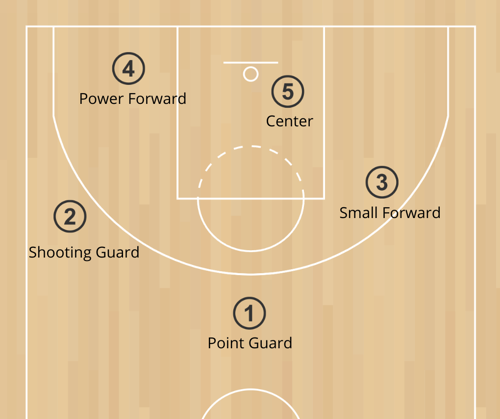

In [47]:
quadra = Image.open('/home/bruno/repos/aula_dsfame/img/quadra.png')
quadra.resize((500, 419))

### Ataque

In [ ]:
# 1. Quantos jogadores em cada posição?

In [ ]:
aux = data_merged['POS'].value_counts().reset_index()
aux = aux.sort_values(by='POS', ascending=True)

px.bar(aux, 
       x='POS', 
       y='count', 
       template='plotly_dark', 
       color='POS',
       opacity=0.6)

  POS  count
0  SG     97
1  SF     79
2   C     78
3  PG     78
4  PF     75
5   F     66
6   G     66


In [ ]:
# 2. Distribuição de pontos na temporada por posição

In [52]:
data_merged[['POS', 'PTS']].groupby('POS').mean('PTS').round(2).reset_index()

,POS,PTS
0,C,482.76
1,F,245.00
2,G,153.82
3,PF,588.84
4,PG,721.42
5,SF,637.29
6,SG,694.54


In [53]:
aux = data_merged[['POS', 'PTS']].groupby('POS').mean('PTS').round(2).reset_index()

px.bar(data_frame=aux,
       x='POS',
       y='PTS',
       color='POS',
       template='plotly_dark',
       opacity=0.6,
       orientation='v')

In [54]:
px.box(data_frame=data_merged,
       x='POS',
       y='PTS',
       color='POS',
       hover_data='PName',
       template='plotly_dark')

In [ ]:
# 3. Distribuição de pontos por jogo na temporada por posição

In [ ]:
px.box(data_frame=data_merged,
       x='POS',
       y='PTSperGP',
       color='POS',
       hover_data='PName',
       template='plotly_dark')

In [ ]:
# 4. Como estão distribuídas as médias de bolas de 3, assistências e lances livres em cada posição?

In [113]:
aux = data_merged[['POS', '3PM', 'AST', 'FTM']].groupby('POS').mean(['3PM', 'AST', 'FTM']).sort_values(by='POS', ascending=True).round(2).reset_index()
aux

,POS,3PM,AST,FTM
0,C,19.65,74.32,84.08
1,F,26.26,41.08,32.38
2,G,20.55,35.03,20.82
3,PF,51.84,109.21,100.65
4,PG,84.26,248.71,123.04
5,SF,75.72,113.44,102.78
6,SG,95.82,153.68,102.20


In [114]:
px.scatter(data_frame=aux,
           x='FTM',
           y='3PM',
           size='AST',
           color='POS',
           template='plotly_dark',
           opacity=0.6,
           height=600,
           width=800)

In [116]:
px.box(data_frame=data_merged,
       x='POS',
       y='3PM',
       color='POS',
       template='plotly_dark',
       hover_data='PName',
       width=800)

### Defesa

In [ ]:
# 1. Como estão distribuídas as médias de bloqueios, roubos de bola e rebotes em cada posição? Em um tabela e um um gráfico de dispersão.

In [70]:
aux = data_merged[['POS', 'BLK', 'STL', 'REB']].groupby('POS').mean(['BLK', 'STL', 'REB']).round(2).reset_index()
aux

,POS,BLK,STL,REB
0,C,43.59,24.62,314.87
1,F,11.82,17.67,125.53
2,G,4.33,12.41,52.80
3,PF,35.32,35.12,293.23
4,PG,14.79,46.95,171.32
5,SF,21.27,40.05,216.94
6,SG,15.46,47.09,185.94


In [111]:
px.scatter(data_frame=aux,
           x='REB',
           y='STL',
           size='BLK',
           color='POS',
           template='plotly_dark',
           opacity=0.6,
           height=600,
           width=800)

In [ ]:
# 2. Como estão distribuídos os valores de roubos de bola por posição?

In [117]:
px.box(data_frame=data_merged,
       x='POS',
       y='STL',
       template='plotly_dark',
       color='POS',
       hover_data='PName',
       width=800)

In [ ]:
# 3. Como estão distribuídas as ações defensivas por posição?

In [76]:
data_merged['DEF_ACTIONS'] = data_merged['STL'] + data_merged['BLK'] + data_merged['REB']

In [118]:
px.box(data_frame=data_merged,
       x='POS',
       color='POS',
       y='DEF_ACTIONS',
       template='plotly_dark',
       hover_data='PName',
       width=800)

In [ ]:
# 4. 

In [99]:
aux = data_merged[['POS', 'BLK', 'STL', 'REB', 'DEF_ACTIONS']].groupby('POS').mean(['BLK', 'STL', 'REB', 'DEF_ACTIONS']).round(2).reset_index()
aux

,POS,BLK,STL,REB,DEF_ACTIONS
0,C,43.59,24.62,314.87,383.08
1,F,11.82,17.67,125.53,155.02
2,G,4.33,12.41,52.80,69.55
3,PF,35.32,35.12,293.23,363.67
4,PG,14.79,46.95,171.32,233.06
5,SF,21.27,40.05,216.94,278.25
6,SG,15.46,47.09,185.94,248.49


## Jogadores

In [92]:
px.scatter(data_frame=data_merged,
           y='3PM',
           x='FGM',
           hover_data='PName',
           template='plotly_dark',
           color='POS',
           size='AST',
           title='3 pontos, field goals e roubos de bola',
           width=1200,
           height=500)